compute evoked data

In [2]:
import mne
sample_data_raw_file="./CAMCAN_MEG_100/CC110033/task/task_raw.fif"
raw = mne.io.read_raw_fif(sample_data_raw_file)
raw.crop(tmin=30,tmax=60).load_data() 

Opening raw data file ./CAMCAN_MEG_100/CC110033/task/task_raw.fif...
    Read a total of 8 projection items:
        mag_ssp_upright.fif : PCA-mags-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v5 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v3 (1 x 306)  idle
    Range : 16000 ... 557999 =     16.000 ...   557.999 secs
Ready.
Reading 0 ... 30000  =      0.000 ...    30.000 secs...


<Raw | task_raw.fif, 339 x 30001 (30.0 s), ~84.0 MB, data loaded>

In [3]:
raw.plot()

Using qt as 2D backend.


Effective window size : 2.048 (s)


c:\Users\zhouz\mne-python\1.3.1_0\envs\mne\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


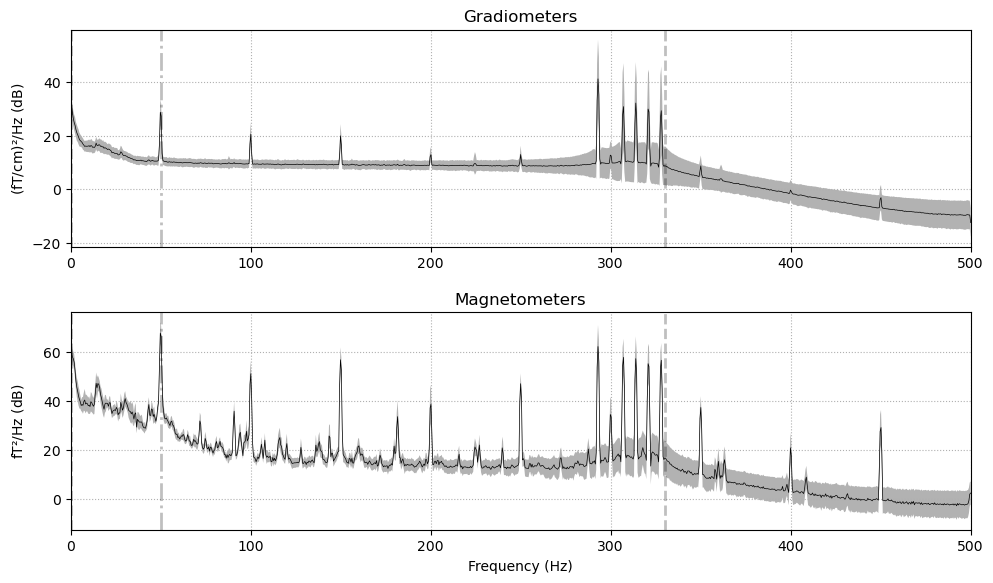

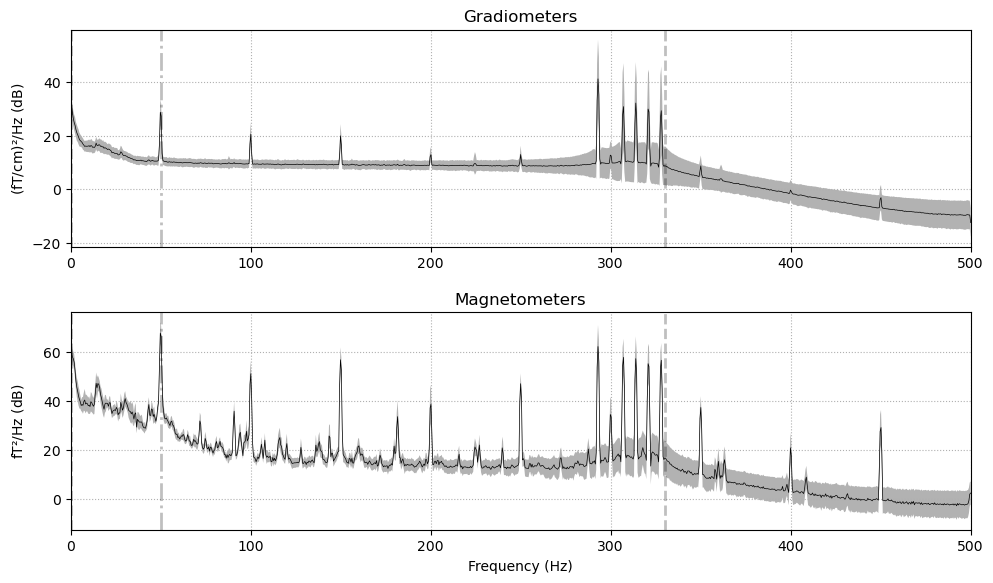

In [4]:
spectrum = raw.compute_psd()
spectrum.plot(average=True, picks="data", exclude="bads")

In [5]:
events = mne.find_events(raw, stim_channel="STI001")
events

5 events found
Event IDs: [5]


array([[56720,     0,     5],
       [58820,     0,     5],
       [60654,     0,     5],
       [62722,     0,     5],
       [64656,     0,     5]], dtype=int64)

In [6]:
event_dict = {"task_event": 5}
epochs = mne.Epochs(raw, events, tmin=-0.3, tmax=0.7, event_id=event_dict, preload=True)
evoked = epochs["task_event"].average()

Not setting metadata
5 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 8)
8 projection items activated
Using data from preloaded Raw for 5 events and 1001 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [7]:
mne.write_evokeds('evoked-ave.fif', evoked, on_mismatch='raise', overwrite=True, verbose=None)

Overwriting existing file.


compute noise covariance (use first 30 s as empty room noise)

In [10]:
sample_data_raw_file="./CAMCAN_MEG_100/CC110033/task/task_raw.fif"
raw_empty_room = mne.io.read_raw_fif(sample_data_raw_file)
raw_empty_room.crop(tmin=0,tmax=30).load_data()

Opening raw data file ./CAMCAN_MEG_100/CC110033/task/task_raw.fif...
    Read a total of 8 projection items:
        mag_ssp_upright.fif : PCA-mags-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v5 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v3 (1 x 306)  idle
    Range : 16000 ... 557999 =     16.000 ...   557.999 secs
Ready.
Reading 0 ... 30000  =      0.000 ...    30.000 secs...


<Raw | task_raw.fif, 339 x 30001 (30.0 s), ~84.0 MB, data loaded>

In [11]:
noise_cov = mne.compute_raw_covariance(raw_empty_room, tmin=0, tmax=None)

Using up to 150 segments
Number of samples used : 30000
[done]


In [12]:
mne.write_cov('CAMCAN-cov.fif', noise_cov, overwrite=True, verbose=None)

Overwriting existing file.
